In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import collections
import json
#from google.colab import drive
from matplotlib import pyplot as plt
import scipy.linalg as la
from sklearn.cluster import KMeans

#drive.mount('/gdrive')

In [0]:
with open('/content/drive/My Drive/data/daily_price_v.json') as json_file:
    json_data = json.load(json_file)
price_s = pd.read_json(json_data)

with open('/content/drive/My Drive/data/fg_sector_bfff_v.json') as json_file:
    json_data = json.load(json_file)
industry_fg = pd.read_json(json_data)

In [0]:
def divvar(mtx):
    a = mtx
    column = [column_name for column_name in mtx.columns]
    for column_name in column:
        a[column_name] = mtx[column_name] / np.var(mtx[column_name])
    return a

In [0]:
def clusnum(mtx):
    pi = mtx.corr()
    eigvals = la.eig(pi)[0]
    
    H = 0
    sum_poseig = 0
    for eigval in eigvals:
        if eigval > 0:
            sum_poseig += eigval
    
    for eigval in eigvals:
        if eigval > 0:
            p_a = eigval / sum_poseig
            H_a = p_a * np.log(p_a)
            H -= H_a
            
    eRank = np.exp(H)
    
    clusnum = int(eRank)
    
    return clusnum

In [6]:
Kp = 4
K1 = int(3168/4)
K2_3 = int(np.sqrt(K1 * Kp))
K2_4 = int(np.power((K1**2)*Kp, 1/3))
K3_4 = int(np.power(K1*(Kp**2), 1/3))
a= (Kp, K1, K2_3, K2_4, K3_4)
a

(4, 792, 56, 135, 23)

In [7]:
price_s

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,A051900,A017670,A028260,A105560,A034730,A015760,A000270,A006400,A018260,A032830,A096770,A035720,A033780,A003550,A066570,A036570,A000810,A086790,A090430,A010950,A009540,A316140,A009150,A010130,A251270,A011170,A091990,A030200,A021240,A024110,...,A223040,A225440,A225650,A226330,A226850,A230490,A232270,A232330,A235010,A235980,A240540,A257730,A262830,A278650,A288330,A290510,A322510,A327260,A335870,A335890,A336060,A336570,A337450,A338100,A340120,A340360,A900010,A900020,A900030,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,-0.66,0.90,2.77,0.00,NaN,-0.32,-2.46,0.42,-0.83,0.80,1.60,-0.24,NaN,-2.32,NaN,-0.84,0.31,-0.54,NaN,NaN,7.57,1.60,-2.35,1.18,-0.13,2.73,2.72,2.63,2.19,-0.32,1.53,NaN,-2.35,1.67,NaN,1.57,NaN,-0.27,2.50,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.29,-2.80,-5.32,NaN,NaN,NaN,NaN,NaN,NaN,-1.55,NaN,NaN,NaN,NaN
2009-01-02,4.21,7.16,-1.92,5.57,NaN,10.94,2.02,5.77,-0.67,3.42,-6.32,0.48,NaN,0.59,NaN,1.86,6.41,3.09,NaN,NaN,7.57,-5.66,2.40,6.09,3.61,4.56,0.00,-2.31,-2.45,1.79,7.27,NaN,3.75,5.61,NaN,8.32,NaN,5.33,-3.19,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.61,0.96,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2009-01-05,1.28,0.56,-0.78,7.91,NaN,-2.00,1.49,4.39,9.15,1.65,-7.02,-2.86,NaN,14.45,NaN,2.82,4.45,1.76,NaN,NaN,2.22,-0.33,-3.21,1.43,1.16,-2.18,-1.33,10.24,-3.13,-0.48,0.70,NaN,0.29,8.81,NaN,7.68,NaN,3.54,-3.88,9.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,-2.86,1.97,NaN,NaN,NaN,NaN,NaN,NaN,4.21,NaN,NaN,NaN,NaN
2009-01-06,4.62,2.35,-3.56,2.22,NaN,-0.87,5.85,1.02,0.62,1.63,3.32,0.49,NaN,3.09,NaN,3.23,1.37,5.20,NaN,NaN,0.72,2.84,0.00,3.59,3.83,0.37,-1.88,-1.19,0.81,0.32,2.09,NaN,5.05,1.43,NaN,1.33,NaN,0.49,-0.81,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40,3.92,1.38,NaN,NaN,NaN,NaN,NaN,NaN,10.61,NaN,NaN,NaN,NaN
2009-01-07,5.22,1.22,6.97,8.48,NaN,2.94,5.99,2.27,1.70,5.91,-3.22,-0.24,NaN,0.25,NaN,1.56,5.42,3.79,NaN,NaN,0.96,5.53,-0.77,2.31,3.32,3.15,-0.27,8.19,-0.80,0.96,5.68,NaN,1.24,3.29,NaN,-1.80,NaN,-3.65,1.02,4.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21,-0.94,1.90,NaN,NaN,NaN,NaN,NaN,NaN,12.33,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-03,-2.00,-0.59,-1.12,-1.49,NaN,-2.52,-0.29,-0.60,-2.47,-1.98,0.52,-1.12,-0.74,0.28,-0.24,0.16,-1.80,4.67,0.32,-1.02,-2.74,3.19,-1.24,-0.48,-0.38,-1.17,-3.89,-2.94,-2.77,-1.95,0.00,NaN,-1.95,-1.32,NaN,-4.41,NaN,0.46,2.44,-0.86,...,0.00,0.25,-0.74,NaN,-0.25,0.00,-0.50,NaN,0.00,NaN,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.53,NaN,-2.07,-6.36,NaN,-0.30,NaN,NaN,NaN,NaN,NaN
2016-08-04,0.00,0.30,0.28,-1.14,NaN,-0.40,1.86,0.60,0.63,-2.24,0.31,-0.23,1.49,0.57,4.34,-2.54,-0.49,2.68,4.40,-0.52,3.52,-1.70,1.67,1.12,-0.38,-3.94,0.92,0.19,1.08,2.26,-0.39,NaN,6.52,-0.19,NaN,-0.49,NaN,-0.15,2.50,-0.43,...,-0.25,0.25,5.24,NaN,0.25,0.25,-0.25,NaN,-0.25,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.91,-1.94,NaN,0.30,NaN,NaN,NaN,NaN,NaN
2016-08-05,2.90,3.42,2.26,1.92,NaN,2.00,-0.19,-1.79,1.01,1.61,-4.47,0.23,2.20,1.97,3.00,-0.33,0.25,1.30,0.60,2.29,2.04,-0.22,1.23,0.00,1.90,-0.41,0.18,1.89,-2.68,-0.13,5.53,NaN,0.17,0.38,NaN,-0.33,NaN,-1.22,-1.66,0.44,...,0.00,-0.25,-1.78,NaN,0.00,-0.50,0.00,NaN,0.00,NaN,-0.73,NaN,NaN,NaN,NaN,NaN,

In [8]:
industry_fg

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,A051900,A017670,A028260,A105560,A034730,A015760,A000270,A006400,A018260,A032830,A096770,A035720,A033780,A003550,A066570,A036570,A000810,A086790,A090430,A010950,A009540,A316140,A009150,A010130,A251270,A011170,A091990,A030200,A021240,A024110,...,A223040,A225440,A225650,A226330,A226850,A230490,A232270,A232330,A235010,A235980,A240540,A257730,A262830,A278650,A288330,A290510,A322510,A327260,A335870,A335890,A336060,A336570,A337450,A338100,A340120,A340360,A900010,A900020,A900030,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,FGSC.30,FGSC.50,FGSC.20,FGSC.40,FGSC.45,FGSC.55,FGSC.25,FGSC.45,FGSC.45,FGSC.40,FGSC.10,FGSC.45,FGSC.30,FGSC.20,FGSC.45,FGSC.45,FGSC.40,FGSC.40,FGSC.30,FGSC.10,FGSC.20,NaN,FGSC.45,FGSC.15,FGSC.45,FGSC.15,FGSC.35,FGSC.50,FGSC.25,FGSC.40,...,FGSC.40,FGSC.40,FGSC.25,NaN,FGSC.40,FGSC.40,FGSC.40,FGSC.40,FGSC.40,NaN,FGSC.40,FGSC.40,FGSC.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGSC.45,FGSC.45,FGSC.25,FGSC.30,FGSC.15,FGSC.15,FGSC.20,FGSC.10,FGSC.20,FGSC.25,FGSC.45,FGSC.25,FGSC.40,NaN
2009-01-02,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,FGSC.30,FGSC.50,FGSC.20,FGSC.40,FGSC.45,FGSC.55,FGSC.25,FGSC.45,FGSC.45,FGSC.40,FGSC.10,FGSC.45,FGSC.30,FGSC.20,FGSC.45,FGSC.45,FGSC.40,FGSC.40,FGSC.30,FGSC.10,FGSC.20,NaN,FGSC.45,FGSC.15,FGSC.45,FGSC.15,FGSC.35,FGSC.50,FGSC.25,FGSC.40,...,FGSC.40,FGSC.40,FGSC.25,NaN,FGSC.40,FGSC.40,FGSC.40,FGSC.40,FGSC.40,NaN,FGSC.40,FGSC.40,FGSC.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGSC.45,FGSC.45,FGSC.25,FGSC.30,FGSC.15,FGSC.15,FGSC.20,FGSC.10,FGSC.20,FGSC.25,FGSC.45,FGSC.25,FGSC.40,NaN
2009-01-05,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,FGSC.30,FGSC.50,FGSC.20,FGSC.40,FGSC.45,FGSC.55,FGSC.25,FGSC.45,FGSC.45,FGSC.40,FGSC.10,FGSC.45,FGSC.30,FGSC.20,FGSC.45,FGSC.45,FGSC.40,FGSC.40,FGSC.30,FGSC.10,FGSC.20,NaN,FGSC.45,FGSC.15,FGSC.45,FGSC.15,FGSC.35,FGSC.50,FGSC.25,FGSC.40,...,FGSC.40,FGSC.40,FGSC.25,NaN,FGSC.40,FGSC.40,FGSC.40,FGSC.40,FGSC.40,NaN,FGSC.40,FGSC.40,FGSC.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGSC.45,FGSC.45,FGSC.25,FGSC.30,FGSC.15,FGSC.15,FGSC.20,FGSC.10,FGSC.20,FGSC.25,FGSC.45,FGSC.25,FGSC.40,NaN
2009-01-06,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,FGSC.30,FGSC.50,FGSC.20,FGSC.40,FGSC.45,FGSC.55,FGSC.25,FGSC.45,FGSC.45,FGSC.40,FGSC.10,FGSC.45,FGSC.30,FGSC.20,FGSC.45,FGSC.45,FGSC.40,FGSC.40,FGSC.30,FGSC.10,FGSC.20,NaN,FGSC.45,FGSC.15,FGSC.45,FGSC.15,FGSC.35,FGSC.50,FGSC.25,FGSC.40,...,FGSC.40,FGSC.40,FGSC.25,NaN,FGSC.40,FGSC.40,FGSC.40,FGSC.40,FGSC.40,NaN,FGSC.40,FGSC.40,FGSC.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGSC.45,FGSC.45,FGSC.25,FGSC.30,FGSC.15,FGSC.15,FGSC.20,FGSC.10,FGSC.20,FGSC.25,FGSC.45,FGSC.25,FGSC.40,NaN
2009-01-07,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,FGSC.30,FGSC.50,FGSC.20,FGSC.40,FGSC.45,FGSC.55,FGSC.25,FGSC.45,FGSC.45,FGSC.40,FGSC.10,FGSC.45,FGSC.30,FGSC.20,FGSC.45,FGSC.45,FGSC.40,FGSC.40,FGSC.30,FGSC.10,FGSC.20,NaN,FGSC.45,FGSC.15,FGSC.45,FGSC.15,FGSC.35,FGSC.50,FGSC.25,FGSC.40,...,FGSC.40,FGSC.40,FGSC.25,NaN,FGSC.40,FGSC.40,FGSC.40,FGSC.40,FGSC.40,NaN,FGSC.40,FGSC.40,FGSC.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FGSC.45,FGSC.45,FGSC.25,FGSC.30,FGSC.15,FGSC.15,FGSC.20,FGSC.10,FGSC.20,FGSC.25,FGSC.45,FGSC.25,FGSC.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-03,FGSC.45,FGSC.45,FGSC.45,FGSC.25,FGSC.35,FGSC.25,FGSC.35,FGSC.15,FGSC.40,FGSC.15,F

In [0]:
#No biased에 대한 결과가 요정도..
def draw_pnl(input_pnl, index_list) :
    draw_data = pd.Series(input_pnl)
    draw_data.index = index_list
    plt.figure(figsize=(10,5))
    plt.plot(draw_data)
    plt.grid(b = True)
    return draw_data


"""
industry_list와 채워진 matrix set을 받으면 loading matrix 로 변환
loading matrix 출력 예시
#loading_m= industry_dic[industry_list[0]]

"""
def make_loading_matrix(industry_list, industry_fg) :
    industry_dic = {}
    for industry in industry_list :
        industry_dic.update({ industry :np.where(industry_fg.values == industry, 1, 0)})
        #print(industry)
    return industry_dic


"""
turn over 계산 function
input
    - portfolio_w : portfolio의 values(numpy type)
    - index_list : 사용하는 데이터의 index list
    
output 
- daliy turnover가 저장된 pd.series type 변수
"""

def make_turn_over_df(portfolio_w , index_list) :
    turn_over = np.zeros(len (portfolio_w))
    for i in range(len (portfolio_w)) :
        if i == len (portfolio_w) -2 :
            break;
        turn_over[i+1] = np.nansum(abs(portfolio_w[i+1] - portfolio_w[i]))

    turn_over_df = pd.Series(turn_over)
    turn_over_df.index = index_list
    return turn_over_df


"""
summary_pnl
 * 포트폴리오의 성과지표를 summary
input
    - portfolio_df : portfolio의 데이터프레임 타입(daily 별 포트폴리오 자산배분이 들어가있음)
    - price_s : 해당기간 주식들의 수익률 정보
    
output 
- summary table : sharp ratio/year pnl/turn over rate 평균등을 계산하고 plot함
"""

def summary_pnl(portfolio_df, turn_over_df, price_s) :
    
    daily_pnl = np.nansum(np.multiply( portfolio_df.values, price_s.values),1)
    #draw_pnl(np.cumsum(daily_pnl), price_s.index)
    cumsum_data = pd.Series(np.cumsum(daily_pnl))
    cumsum_data.index = price_s.index
    plt.figure(figsize=(10,5))
    plt.plot(cumsum_data)
    plt.grid(b = True)
    
    draw_data = pd.Series(daily_pnl)
    draw_data.index = price_s.index

    summary_table = pd.DataFrame(index=draw_data.resample('Y').mean().index , columns=['Sharp_ratio', 'Profit and Loss(%)', 'Turn_over_rate(%)'])
    summary_table['Sharp_ratio'] = draw_data.resample('Y').mean() *np.sqrt(250) / draw_data.resample('Y').std()
    summary_table['Profit and Loss(%)'] = draw_data.resample('Y').mean() *250
    summary_table['Turn_over_rate(%)'] = turn_over_df.resample('Y').mean() *100
    
    return summary_table

In [0]:
# mean_reversion 포트폴리오 생성 전략
def mean_reversion(input_data, industry_list, industry_dic) :
    #input_data = pr_rolling
    total_ammount = 1

    portfolio = np.zeros(input_data.shape)
    nn_price_s = input_data.values

    for industry in industry_list :
        print(industry)
        loading_m = industry_dic[industry]
        loading_return = np.where(loading_m == 1, nn_price_s, np.nan)
        #여기 0값 집어넣어서 난리남..

        for i in range(len(input_data.index)) :

            loading_return[i] -= np.nanmean(loading_return[i])
            loading_return[i] = np.where(np.isnan(loading_return[i]), 0, loading_return[i])

            portfolio[i] += loading_return[i] 


    portfolio = np.where(np.isnan(portfolio),0 , portfolio)
    portfolio = np.where(portfolio > 0 , -1, 1)

    abs_sum = np.sum(np.abs(portfolio), 1)
    weight = total_ammount/abs_sum 
    weight[total_ammount/abs_sum == np.inf] = 0
    d = np.diag(weight)
    portfolio_w = np.matmul(d, portfolio )


    #make portfolio df with init zero
    portfolio_df = input_data.copy()
    for col in portfolio_df.columns:
        portfolio_df[col].values[:] = 0

    portfolio_df.loc[:,:] = portfolio_w
    turn_over_df = make_turn_over_df(portfolio_w , input_data.index)
    
    
    portfolio_df = portfolio_df.shift(1)
    
    return portfolio_df,turn_over_df

In [0]:
# mean_reversion 포트폴리오 생성 전략
def mean_reversion(input_data, industry_list, industry_dic) :
    #input_data = pr_rolling
    total_ammount = 1

    portfolio = np.zeros(input_data.shape)
    nn_price_s = input_data.values

    for industry in industry_list :
        print(industry)
        loading_m = industry_dic[industry]
        loading_return = np.where(loading_m == 1, nn_price_s, np.nan)
        #여기 0값 집어넣어서 난리남..

        for i in range(len(input_data.index)) :

            loading_return[i] -= np.nanmean(loading_return[i])
            loading_return[i] = np.where(np.isnan(loading_return[i]), 0, loading_return[i])

            portfolio[i] += loading_return[i] 


    portfolio = np.where(np.isnan(portfolio),0 , portfolio)
    portfolio = np.where(portfolio > 0 , -1, 1)

    abs_sum = np.sum(np.abs(portfolio), 1)
    weight = total_ammount/abs_sum 
    weight[total_ammount/abs_sum == np.inf] = 0
    d = np.diag(weight)
    portfolio_w = np.matmul(d, portfolio )


    #make portfolio df with init zero
    portfolio_df = input_data.copy()
    for col in portfolio_df.columns:
        portfolio_df[col].values[:] = 0

    portfolio_df.loc[:,:] = portfolio_w
    turn_over_df = make_turn_over_df(portfolio_w , input_data.index)
    
    
    portfolio_df = portfolio_df.shift(1)
    
    return portfolio_df,turn_over_df

In [19]:
clusnum = a[2]
industry_list = ["cluster_"+str(i+1) for i in range(clusnum)]
industry_list

['cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9',
 'cluster_10',
 'cluster_11',
 'cluster_12',
 'cluster_13',
 'cluster_14',
 'cluster_15',
 'cluster_16',
 'cluster_17',
 'cluster_18',
 'cluster_19',
 'cluster_20',
 'cluster_21',
 'cluster_22',
 'cluster_23',
 'cluster_24',
 'cluster_25',
 'cluster_26',
 'cluster_27',
 'cluster_28',
 'cluster_29',
 'cluster_30',
 'cluster_31',
 'cluster_32',
 'cluster_33',
 'cluster_34',
 'cluster_35',
 'cluster_36',
 'cluster_37',
 'cluster_38',
 'cluster_39',
 'cluster_40',
 'cluster_41',
 'cluster_42',
 'cluster_43',
 'cluster_44',
 'cluster_45',
 'cluster_46',
 'cluster_47',
 'cluster_48',
 'cluster_49',
 'cluster_50',
 'cluster_51',
 'cluster_52',
 'cluster_53',
 'cluster_54',
 'cluster_55',
 'cluster_56']

In [0]:
industry_fg_kmeans_t = np.transpose(industry_fg.copy())
label_array = []
for i in range(len(price_s)):
    five_days = np.transpose(price_s.iloc[max(0, i-4):i+1])
    five_days_fill = five_days.fillna(five_days.mean())
    five_days_divvar = divvar(five_days_fill)
    
    model = KMeans(n_clusters = clusnum, algorithm = 'auto')
    five_days_kmeans = model.fit(five_days_divvar)
    y = five_days_kmeans.labels_
    label_y = []
    for j in range(len(y)):
        label_y.append("cluster_"+str(y[j]+1))
    
    label_array.append(label_y)
    print(str(i+1)+"th day labeling completed.")

n = 0

for col in industry_fg_kmeans_t.columns:
    industry_fg_kmeans_t[col] = label_array[n]
    n+=1

industry_fg_kmeans = np.transpose(industry_fg_kmeans_t)

industry_fg_kmeans

In [12]:
b = industry_fg_kmeans.copy()
b

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,A051900,A017670,A028260,A105560,A034730,A015760,A000270,A006400,A018260,A032830,A096770,A035720,A033780,A003550,A066570,A036570,A000810,A086790,A090430,A010950,A009540,A316140,A009150,A010130,A251270,A011170,A091990,A030200,A021240,A024110,...,A223040,A225440,A225650,A226330,A226850,A230490,A232270,A232330,A235010,A235980,A240540,A257730,A262830,A278650,A288330,A290510,A322510,A327260,A335870,A335890,A336060,A336570,A337450,A338100,A340120,A340360,A900010,A900020,A900030,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,cluster_13,cluster_2,cluster_38,cluster_45,cluster_2,cluster_8,cluster_6,cluster_23,cluster_13,cluster_46,cluster_21,cluster_8,cluster_2,cluster_6,cluster_2,cluster_13,cluster_23,cluster_42,cluster_2,cluster_2,cluster_25,cluster_21,cluster_6,cluster_29,cluster_8,cluster_32,cluster_32,cluster_32,cluster_1,cluster_8,cluster_21,cluster_2,cluster_6,cluster_21,cluster_2,cluster_21,cluster_2,cluster_8,cluster_32,cluster_23,...,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_20,cluster_44,cluster_56,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_20,cluster_2,cluster_2,cluster_2,cluster_2
2009-01-02,cluster_40,cluster_52,cluster_13,cluster_16,cluster_1,cluster_56,cluster_39,cluster_16,cluster_3,cluster_40,cluster_5,cluster_19,cluster_1,cluster_39,cluster_1,cluster_28,cluster_16,cluster_40,cluster_1,cluster_1,cluster_20,cluster_5,cluster_15,cluster_52,cluster_40,cluster_27,cluster_11,cluster_13,cluster_13,cluster_28,cluster_52,cluster_1,cluster_15,cluster_52,cluster_1,cluster_52,cluster_1,cluster_16,cluster_13,cluster_19,...,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_15,cluster_39,cluster_17,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_3,cluster_1,cluster_1,cluster_1,cluster_1
2009-01-05,cluster_29,cluster_29,cluster_15,cluster_20,cluster_1,cluster_43,cluster_27,cluster_39,cluster_8,cluster_1,cluster_42,cluster_50,cluster_1,cluster_3,cluster_1,cluster_27,cluster_39,cluster_1,cluster_1,cluster_1,cluster_23,cluster_12,cluster_50,cluster_29,cluster_29,cluster_14,cluster_37,cluster_8,cluster_15,cluster_13,cluster_29,cluster_1,cluster_31,cluster_20,cluster_1,cluster_39,cluster_1,cluster_29,cluster_15,cluster_8,...,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_35,cluster_50,cluster_11,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_51,cluster_1,cluster_1,cluster_1,cluster_1
2009-01-06,cluster_48,cluster_48,cluster_34,cluster_1,cluster_2,cluster_33,cluster_17,cluster_1,cluster_5,cluster_2,cluster_32,cluster_6,cluster_2,cluster_21,cluster_2,cluster_17,cluster_1,cluster_17,cluster_2,cluster_2,cluster_4,cluster_40,cluster_44,cluster_48,cluster_48,cluster_31,cluster_34,cluster_21,cluster_6,cluster_11,cluster_48,cluster_2,cluster_48,cluster_5,cluster_2,cluster_1,cluster_2,cluster_27,cluster_6,cluster_5,...,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_27,cluster_44,cluster_36,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_3,cluster_2,cluster_2,clust

In [16]:
industry_list[0]

'Cluster_1'

In [0]:
industry_dic = make_loading_matrix(industry_list, industry_fg_kmeans)

In [21]:
industry_dic[industry_list[12]]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
signal = price_s.rolling(5, min_periods=1).mean()
portfolio_df,turn_over_df = mean_reversion(signal, industry_list, industry_dic)

cluster_1
cluster_2
cluster_3
cluster_4
cluster_5
cluster_6
cluster_7
cluster_8
cluster_9
cluster_10
cluster_11
cluster_12
cluster_13
cluster_14
cluster_15
cluster_16
cluster_17
cluster_18
cluster_19
cluster_20
cluster_21
cluster_22
cluster_23
cluster_24
cluster_25
cluster_26
cluster_27
cluster_28
cluster_29
cluster_30
cluster_31
cluster_32
cluster_33
cluster_34
cluster_35
cluster_36
cluster_37
cluster_38
cluster_39
cluster_40
cluster_41
cluster_42
cluster_43
cluster_44
cluster_45
cluster_46
cluster_47
cluster_48
cluster_49
cluster_50
cluster_51
cluster_52
cluster_53
cluster_54
cluster_55
cluster_56


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,Sharp_ratio,Profit and Loss(%),Turn_over_rate(%)
2009-12-31,1.796701,2.373716,40.978684
2010-12-31,0.194423,0.249601,40.141706
2011-12-31,1.085265,1.680031,41.629755
2012-12-31,1.616197,1.899152,41.415414
2013-12-31,2.409580,2.367721,41.400339
2014-12-31,1.193465,1.054064,42.648423
2015-12-31,1.943804,2.541054,44.839524
2016-12-31,1.700615,1.844716,45.962138


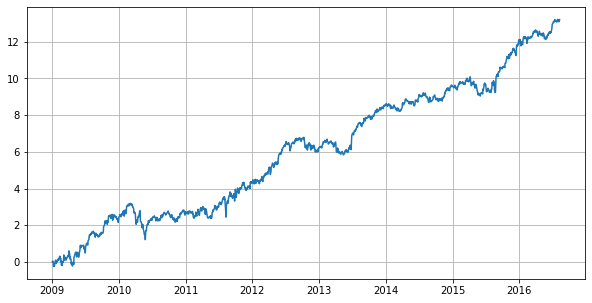

In [23]:
summary_pnl(portfolio_df, turn_over_df, price_s)

In [24]:
clusnum = a[3]
industry_list = ["cluster_"+str(i+1) for i in range(clusnum)]
industry_list

['cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9',
 'cluster_10',
 'cluster_11',
 'cluster_12',
 'cluster_13',
 'cluster_14',
 'cluster_15',
 'cluster_16',
 'cluster_17',
 'cluster_18',
 'cluster_19',
 'cluster_20',
 'cluster_21',
 'cluster_22',
 'cluster_23',
 'cluster_24',
 'cluster_25',
 'cluster_26',
 'cluster_27',
 'cluster_28',
 'cluster_29',
 'cluster_30',
 'cluster_31',
 'cluster_32',
 'cluster_33',
 'cluster_34',
 'cluster_35',
 'cluster_36',
 'cluster_37',
 'cluster_38',
 'cluster_39',
 'cluster_40',
 'cluster_41',
 'cluster_42',
 'cluster_43',
 'cluster_44',
 'cluster_45',
 'cluster_46',
 'cluster_47',
 'cluster_48',
 'cluster_49',
 'cluster_50',
 'cluster_51',
 'cluster_52',
 'cluster_53',
 'cluster_54',
 'cluster_55',
 'cluster_56',
 'cluster_57',
 'cluster_58',
 'cluster_59',
 'cluster_60',
 'cluster_61',
 'cluster_62',
 'cluster_63',
 'cluster_64',
 'cluster_65',
 'cluster_66',
 'cluster_67',
 'cl

In [0]:
industry_fg_kmeans_t = np.transpose(industry_fg.copy())
label_array = []
for i in range(len(price_s)):
    five_days = np.transpose(price_s.iloc[max(0, i-4):i+1])
    five_days_fill = five_days.fillna(five_days.mean())
    five_days_divvar = divvar(five_days_fill)
    
    model = KMeans(n_clusters = clusnum, algorithm = 'auto')
    five_days_kmeans = model.fit(five_days_divvar)
    y = five_days_kmeans.labels_
    label_y = []
    for j in range(len(y)):
        label_y.append("cluster_"+str(y[j]+1))
    
    label_array.append(label_y)
    print(str(i)+"th day labeling completed.")

n = 0

for col in industry_fg_kmeans_t.columns:
    industry_fg_kmeans_t[col] = label_array[n]
    n+=1

industry_fg_kmeans = np.transpose(industry_fg_kmeans_t)

industry_fg_kmeans

In [26]:
c = industry_fg_kmeans.copy()
c

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,A051900,A017670,A028260,A105560,A034730,A015760,A000270,A006400,A018260,A032830,A096770,A035720,A033780,A003550,A066570,A036570,A000810,A086790,A090430,A010950,A009540,A316140,A009150,A010130,A251270,A011170,A091990,A030200,A021240,A024110,...,A223040,A225440,A225650,A226330,A226850,A230490,A232270,A232330,A235010,A235980,A240540,A257730,A262830,A278650,A288330,A290510,A322510,A327260,A335870,A335890,A336060,A336570,A337450,A338100,A340120,A340360,A900010,A900020,A900030,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,cluster_105,cluster_1,cluster_99,cluster_11,cluster_1,cluster_34,cluster_36,cluster_23,cluster_16,cluster_94,cluster_57,cluster_93,cluster_1,cluster_14,cluster_1,cluster_16,cluster_116,cluster_58,cluster_1,cluster_1,cluster_37,cluster_57,cluster_14,cluster_103,cluster_93,cluster_99,cluster_99,cluster_78,cluster_33,cluster_34,cluster_57,cluster_1,cluster_14,cluster_13,cluster_1,cluster_57,cluster_1,cluster_34,cluster_19,cluster_89,...,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_111,cluster_75,cluster_38,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_7,cluster_1,cluster_1,cluster_1,cluster_1
2009-01-02,cluster_114,cluster_99,cluster_107,cluster_54,cluster_1,cluster_20,cluster_82,cluster_54,cluster_97,cluster_9,cluster_11,cluster_23,cluster_1,cluster_82,cluster_1,cluster_134,cluster_54,cluster_37,cluster_1,cluster_1,cluster_67,cluster_11,cluster_56,cluster_48,cluster_9,cluster_91,cluster_113,cluster_107,cluster_107,cluster_102,cluster_18,cluster_1,cluster_56,cluster_48,cluster_1,cluster_51,cluster_1,cluster_54,cluster_122,cluster_58,...,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_37,cluster_127,cluster_43,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_32,cluster_1,cluster_1,cluster_1,cluster_1
2009-01-05,cluster_44,cluster_82,cluster_26,cluster_73,cluster_2,cluster_109,cluster_16,cluster_126,cluster_123,cluster_83,cluster_12,cluster_43,cluster_2,cluster_27,cluster_2,cluster_83,cluster_126,cluster_83,cluster_2,cluster_2,cluster_120,cluster_5,cluster_97,cluster_22,cluster_112,cluster_50,cluster_90,cluster_110,cluster_87,cluster_99,cluster_82,cluster_2,cluster_16,cluster_3,cluster_2,cluster_106,cluster_2,cluster_126,cluster_87,cluster_69,...,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_68,cluster_52,cluster_33,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_10,cluster_2,cluster_2,cluster_2,cluster_2
2009-01-06,cluster_52,cluster_111,cluster_76,cluster_110,cluster_3,cluster_131,cluster_73,cluster_51,cluster_84,cluster_3,cluster_67,cluster_1,cluster_3,cluster_103,cluster_3,cluster_29,cluster_51,cluster_97,cluster_3,cluster_3,cluster_79,cluster_21,cluster_114,cluster_111,cluster_52,cluster_34,cluster_76,cluster_122,cluster_69,cluster_80,cluster_111,cluster_3,cluster_52,cluster_110,cluster_3,cluster_110,cluster_3,cluster_51,cluster_69,cluster_84,...,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_3,cluster_2,cluster_128,cluster_72,cluster_3,cluster_3,cluster_3,cluster_

In [0]:
industry_dic = make_loading_matrix(industry_list, industry_fg_kmeans)

In [29]:
industry_dic[industry_list[104]]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
signal = price_s.rolling(5, min_periods=1).mean()
portfolio_df,turn_over_df = mean_reversion(signal, industry_list, industry_dic)

cluster_1
cluster_2
cluster_3
cluster_4
cluster_5
cluster_6
cluster_7
cluster_8
cluster_9
cluster_10
cluster_11
cluster_12
cluster_13
cluster_14
cluster_15
cluster_16
cluster_17
cluster_18
cluster_19
cluster_20
cluster_21
cluster_22
cluster_23
cluster_24
cluster_25
cluster_26
cluster_27
cluster_28
cluster_29
cluster_30
cluster_31
cluster_32
cluster_33
cluster_34
cluster_35
cluster_36
cluster_37
cluster_38
cluster_39
cluster_40
cluster_41
cluster_42
cluster_43
cluster_44
cluster_45
cluster_46
cluster_47
cluster_48
cluster_49
cluster_50
cluster_51
cluster_52
cluster_53
cluster_54
cluster_55
cluster_56
cluster_57
cluster_58
cluster_59
cluster_60
cluster_61
cluster_62
cluster_63
cluster_64
cluster_65
cluster_66
cluster_67
cluster_68
cluster_69
cluster_70
cluster_71
cluster_72
cluster_73
cluster_74
cluster_75
cluster_76
cluster_77
cluster_78
cluster_79
cluster_80
cluster_81
cluster_82
cluster_83
cluster_84
cluster_85
cluster_86
cluster_87
cluster_88
cluster_89
cluster_90
cluster_91
cluster_

,Sharp_ratio,Profit and Loss(%),Turn_over_rate(%)
2009-12-31,0.927167,1.071222,44.088523
2010-12-31,0.977328,1.107106,43.083223
2011-12-31,1.353064,1.870023,44.708680
2012-12-31,1.444160,1.639658,44.582162
2013-12-31,1.521647,1.421282,44.454668
2014-12-31,1.061905,0.878527,45.557617
2015-12-31,1.483669,1.793267,48.070422
2016-12-31,1.491113,1.654337,49.704257


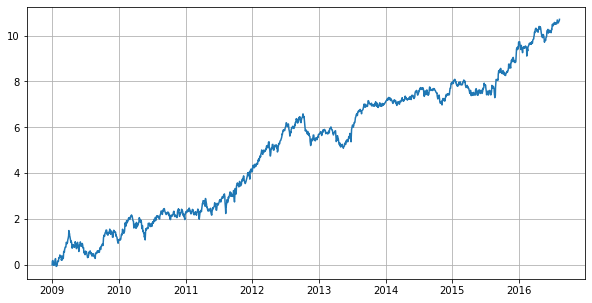

In [31]:
summary_pnl(portfolio_df, turn_over_df, price_s)

In [32]:
clusnum = a[4]
industry_list = ["cluster_"+str(i+1) for i in range(clusnum)]
industry_list

['cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9',
 'cluster_10',
 'cluster_11',
 'cluster_12',
 'cluster_13',
 'cluster_14',
 'cluster_15',
 'cluster_16',
 'cluster_17',
 'cluster_18',
 'cluster_19',
 'cluster_20',
 'cluster_21',
 'cluster_22',
 'cluster_23']

In [0]:
industry_fg_kmeans_t = np.transpose(industry_fg.copy())
label_array = []
for i in range(len(price_s)):
    five_days = np.transpose(price_s.iloc[max(0, i-4):i+1])
    five_days_fill = five_days.fillna(five_days.mean())
    five_days_divvar = divvar(five_days_fill)
    
    model = KMeans(n_clusters = clusnum, algorithm = 'auto')
    five_days_kmeans = model.fit(five_days_divvar)
    y = five_days_kmeans.labels_
    label_y = []
    for j in range(len(y)):
        label_y.append("cluster_"+str(y[j]+1))
    
    label_array.append(label_y)
    print(str(i)+"th day labeling completed.")

n = 0

for col in industry_fg_kmeans_t.columns:
    industry_fg_kmeans_t[col] = label_array[n]
    n+=1

industry_fg_kmeans = np.transpose(industry_fg_kmeans_t)

industry_fg_kmeans

In [34]:
d = industry_fg_kmeans.copy()
d

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,A051900,A017670,A028260,A105560,A034730,A015760,A000270,A006400,A018260,A032830,A096770,A035720,A033780,A003550,A066570,A036570,A000810,A086790,A090430,A010950,A009540,A316140,A009150,A010130,A251270,A011170,A091990,A030200,A021240,A024110,...,A223040,A225440,A225650,A226330,A226850,A230490,A232270,A232330,A235010,A235980,A240540,A257730,A262830,A278650,A288330,A290510,A322510,A327260,A335870,A335890,A336060,A336570,A337450,A338100,A340120,A340360,A900010,A900020,A900030,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,cluster_1,cluster_4,cluster_6,cluster_14,cluster_4,cluster_1,cluster_10,cluster_14,cluster_1,cluster_4,cluster_15,cluster_14,cluster_4,cluster_10,cluster_4,cluster_1,cluster_14,cluster_1,cluster_4,cluster_4,cluster_11,cluster_15,cluster_10,cluster_4,cluster_14,cluster_6,cluster_6,cluster_6,cluster_15,cluster_1,cluster_15,cluster_4,cluster_10,cluster_15,cluster_4,cluster_15,cluster_4,cluster_1,cluster_6,cluster_4,...,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_21,cluster_17,cluster_13,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_4,cluster_21,cluster_4,cluster_4,cluster_4,cluster_4
2009-01-02,cluster_2,cluster_11,cluster_12,cluster_2,cluster_9,cluster_10,cluster_20,cluster_2,cluster_16,cluster_2,cluster_7,cluster_16,cluster_9,cluster_20,cluster_9,cluster_20,cluster_11,cluster_2,cluster_9,cluster_9,cluster_6,cluster_7,cluster_20,cluster_6,cluster_2,cluster_6,cluster_1,cluster_12,cluster_12,cluster_9,cluster_6,cluster_9,cluster_20,cluster_6,cluster_9,cluster_11,cluster_9,cluster_2,cluster_12,cluster_16,...,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_20,cluster_20,cluster_19,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_9,cluster_20,cluster_9,cluster_9,cluster_9,cluster_9
2009-01-05,cluster_2,cluster_19,cluster_8,cluster_4,cluster_2,cluster_7,cluster_18,cluster_4,cluster_4,cluster_2,cluster_8,cluster_22,cluster_2,cluster_11,cluster_2,cluster_2,cluster_4,cluster_2,cluster_2,cluster_2,cluster_5,cluster_8,cluster_6,cluster_19,cluster_2,cluster_19,cluster_9,cluster_11,cluster_8,cluster_1,cluster_19,cluster_2,cluster_6,cluster_4,cluster_2,cluster_4,cluster_2,cluster_4,cluster_8,cluster_4,...,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_4,cluster_6,cluster_18,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_2,cluster_21,cluster_2,cluster_2,cluster_2,cluster_2
2009-01-06,cluster_14,cluster_15,cluster_7,cluster_11,cluster_1,cluster_5,cluster_14,cluster_11,cluster_11,cluster_1,cluster_21,cluster_21,cluster_1,cluster_13,cluster_1,cluster_14,cluster_11,cluster_14,cluster_1,cluster_1,cluster_4,cluster_20,cluster_17,cluster_15,cluster_1,cluster_15,cluster_12,cluster_2,cluster_21,cluster_17,cluster_15,cluster_1,cluster_14,cluster_11,cluster_1,cluster_11,cluster_1,cluster_11,cluster_21,cluster_11,...,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_11,cluster_21,cluster_17,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_1,cluster_6,cluster_1,cluster_1,cluster_1,cluster_1
2009-01-07,clust

In [0]:
industry_dic = make_loading_matrix(industry_list, industry_fg_kmeans)

In [37]:
industry_dic[industry_list[0]]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [38]:
signal = price_s.rolling(5, min_periods=1).mean()
portfolio_df,turn_over_df = mean_reversion(signal, industry_list, industry_dic)

cluster_1
cluster_2
cluster_3
cluster_4
cluster_5
cluster_6
cluster_7
cluster_8
cluster_9
cluster_10
cluster_11
cluster_12
cluster_13
cluster_14
cluster_15
cluster_16
cluster_17
cluster_18
cluster_19
cluster_20
cluster_21
cluster_22
cluster_23


,Sharp_ratio,Profit and Loss(%),Turn_over_rate(%)
2009-12-31,1.707642,2.658527,36.661149
2010-12-31,-0.138667,-0.191941,35.608073
2011-12-31,1.613301,2.677576,37.365591
2012-12-31,0.136488,0.190737,37.138268
2013-12-31,2.631382,2.881596,36.647855
2014-12-31,0.477443,0.482043,37.933673
2015-12-31,1.847490,2.696159,40.053000
2016-12-31,2.426733,3.448664,40.657837


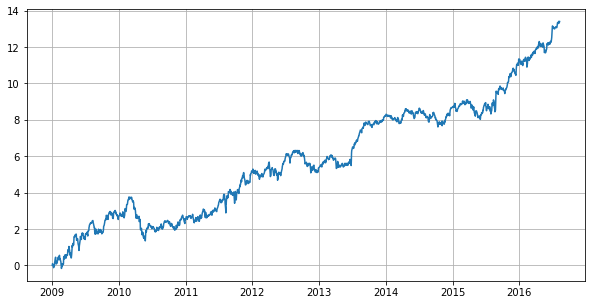

In [39]:
summary_pnl(portfolio_df, turn_over_df, price_s)

In [0]:
#z = np.transpose(price_s.iloc[1:6])
#z_fill = z.fillna(z.mean())
#z_divvar = divvar(z_fill)
#model = KMeans(n_clusters = clusnum, algorithm = 'auto')
#z_kmeans = model.fit(z_divvar)
#y = z_kmeans.labels_
#g= []
#for i in range(len(y)):
#    g.append("Cluster_"+str(y[i]+1))
#g
#h = np.transpose(industry_fg.copy())
#for col in h.columns:
#    h[col] = g
#h1 = np.transpose(h)
#h1
    

,A005930,A000660,A035420,A005380,A207940,A012330,A068270,A051910,A055550,A005490,...,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950190
2009-01-01,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2009-01-02,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2009-01-05,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2009-01-06,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2009-01-07,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-03,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2016-08-04,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2016-08-05,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
2016-08-08,Cluster_39,Cluster_33,Cluster_26,Cluster_40,Cluster_2,Cluster_7,Cluster_56,Cluster_32,Cluster_29,Cluster_26,...,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_2,Cluster_16,Cluster_2,Cluster_2,Cluster_2,Cluster_2
